In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
class classifier(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int) -> None:
        super().__init__()
        self.name = 'Simple 3 Layer Classifier'
        self.layer1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.layer2 = nn.Linear(in_features=hidden_size, out_features=output_size)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x


In [9]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [10]:
simple_classifier = classifier(30, 512, 1).to(device=device)
simple_classifier

classifier(
  (layer1): Linear(in_features=30, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=None)
)

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [13]:
from torch.autograd import Variable

In [14]:
x_data_train = Variable(torch.from_numpy(X_train.values))
y_data_train = Variable(torch.from_numpy(np.array(y_train)))
x_data_test = Variable(torch.from_numpy(X_test.values))
y_data_test = Variable(torch.from_numpy(np.array(y_test)))

In [43]:
simple_classifier = classifier(30, 512, 1).to(device=device)
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(simple_classifier.parameters(), lr=0.001)
train_losses = []
test_losses = []

for epochs in range(1000):
    simple_classifier.train()
    y_pred = simple_classifier(x_data_train.float())
    loss = criterion(y_pred, y_data_train.view(-1, 1).float())
    print(f'Epoch: {epochs} - Loss: {loss.item()}')
    train_losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10 == 0:
        simple_classifier.eval()
        y_pred = simple_classifier(x_data_test.float())
        loss = criterion(y_pred, y_data_test.view(-1, 1).float())
        test_losses.append(loss.item())
        

Epoch: 0 - Loss: 317.9700622558594
Epoch: 1 - Loss: 292.9903564453125
Epoch: 2 - Loss: 277.05914306640625
Epoch: 3 - Loss: 268.94287109375
Epoch: 4 - Loss: 264.45355224609375
Epoch: 5 - Loss: 259.9069519042969
Epoch: 6 - Loss: 254.21243286132812
Epoch: 7 - Loss: 247.53517150878906
Epoch: 8 - Loss: 240.53195190429688
Epoch: 9 - Loss: 233.71426391601562
Epoch: 10 - Loss: 227.77926635742188
Epoch: 11 - Loss: 222.64248657226562
Epoch: 12 - Loss: 218.22100830078125
Epoch: 13 - Loss: 214.5519256591797
Epoch: 14 - Loss: 211.1843719482422
Epoch: 15 - Loss: 207.65322875976562
Epoch: 16 - Loss: 204.08811950683594
Epoch: 17 - Loss: 200.82565307617188
Epoch: 18 - Loss: 197.68576049804688
Epoch: 19 - Loss: 194.42147827148438
Epoch: 20 - Loss: 191.09329223632812
Epoch: 21 - Loss: 187.7642059326172
Epoch: 22 - Loss: 184.35675048828125
Epoch: 23 - Loss: 180.8656768798828
Epoch: 24 - Loss: 177.5909423828125
Epoch: 25 - Loss: 174.24539184570312
Epoch: 26 - Loss: 170.9434356689453
Epoch: 27 - Loss: 168.0

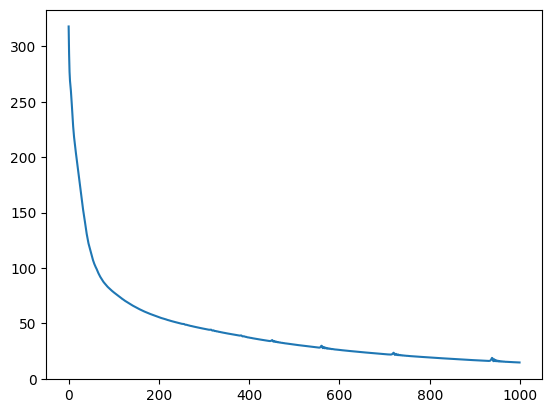

In [44]:
import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.show()

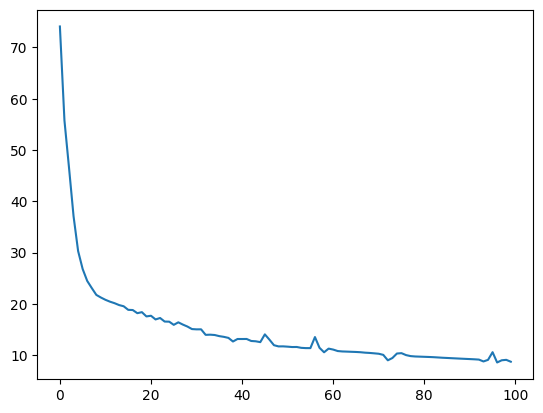

In [45]:
plt.plot(test_losses)
plt.show()

In [46]:
simple_classifier.eval()
y_pred = simple_classifier(x_data_test.float())
loss = criterion(y_pred, y_data_test.view(-1, 1).float())
print(loss.item())

8.877137184143066


In [47]:
result = torch.where(y_pred > 0.5, 1, 0)

In [48]:
result.size()

torch.Size([114, 1])

In [49]:
y_data_test.view(-1,1).size()

torch.Size([114, 1])

In [50]:
evals = (result == y_data_test.view(-1,1)).float()

In [51]:
evals.squeeze(1).sum()/114

tensor(0.9649)